In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

In [3]:
from sklearn.datasets import fetch_20newsgroups

data  = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
categories  = ['comp.graphics', 'sci.space', 'soc.religion.christian', 'talk.religion.misc']
train       = fetch_20newsgroups(subset='train', categories=categories)
test        = fetch_20newsgroups(subset='test' , categories=categories)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [7]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [8]:
ypred = model.predict(test.data)

In [9]:
from sklearn.metrics import classification_report
print(classification_report(test.target, ypred,
                            target_names=test.target_names))

                        precision    recall  f1-score   support

         comp.graphics       0.97      0.88      0.92       389
             sci.space       0.92      0.92      0.92       394
soc.religion.christian       0.62      0.98      0.76       398
    talk.religion.misc       1.00      0.19      0.32       251

              accuracy                           0.80      1432
             macro avg       0.88      0.75      0.73      1432
          weighted avg       0.86      0.80      0.77      1432



In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(test.target, ypred)

0.8016759776536313

Text(109.44999999999996, 0.5, 'predicted labels')

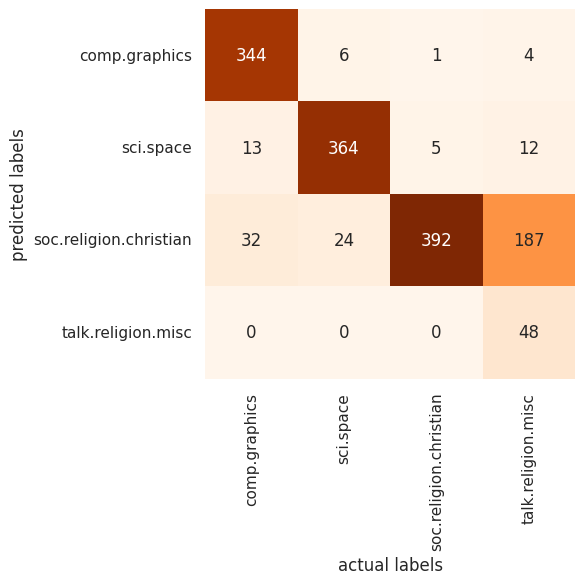

In [11]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, ypred)
sns.heatmap(mat.T, square=True, annot=True, cbar=False, fmt='d',
            xticklabels=test.target_names,
            yticklabels=test.target_names,
            cmap='Oranges')
plt.xlabel('actual labels')
plt.ylabel('predicted labels')

In [12]:
def predict_category(s, test=test, model=model):
  ypred = model.predict([s])
  return test.target_names[ypred[0]]

In [13]:
predict_category('The stars revolve around the center of the galaxy which is usually inhabited by a super massive black hole')

'sci.space'

In [14]:
print( predict_category('sending a payload to the ISS')
print( predict_category('discussing islam vs atheism')
print( predict_category('determining the screen resolution')
print( predict_category('These advantages mean a naive Bayesian classifier is often a \
good choice as an initial baseline classification.')

sci.space
